<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/grus_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [198]:
url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)

In [199]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [200]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [201]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:

import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [203]:
def applytechnicals(df):
  for i in range (2,10,4):
    df['rsi_'+str(i)]=ta.momentum.rsi(df.Close,window=i)
    df['SMA_'+str(i)]=df.Close.rolling(i*10).mean()
  df['macd']  =ta.trend.macd_diff(df.Close)
  df.dropna(inplace= True)

In [204]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [205]:
applytechnicals(df)
df

,Open,High,Low,Close,Adj Close,Volume,rsi_2,SMA_2,rsi_6,SMA_6,macd
Date,,,,,,,,,,,
2020-10-12,0.048891,0.050484,0.046535,0.047589,0.047589,9049431,45.692130,0.045914,52.276238,0.049379,0.000584
2020-10-13,0.047421,0.049109,0.045674,0.046522,0.046522,7175418,30.796000,0.046106,48.313257,0.049060,0.000434
2020-10-14,0.046483,0.046989,0.045195,0.045895,0.045895,4333146,22.265172,0.046012,45.861645,0.048975,0.000280
2020-10-15,0.045956,0.046236,0.044238,0.045027,0.045027,3469517,12.600755,0.045829,42.296152,0.048712,0.000116
2020-10-16,0.045025,0.045025,0.041341,0.043696,0.043696,6499827,5.405304,0.045687,37.002657,0.048540,-0.000076
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424,65.808704,3.234065,40.737599,3.209165,-0.066120
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147,37.201068,3.204703,35.951236,3.187497,-0.060530
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519,48.618327,3.175205,38.178917,3.167078,-0.051785


In [206]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'rsi_2', 'SMA_2',
       'rsi_6', 'SMA_6', 'macd'],
      dtype='object')

In [207]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [208]:
applytechnicals(df)
df

,Open,High,Low,Close,Adj Close,Volume,rsi_2,SMA_2,rsi_6,SMA_6,macd
Date,,,,,,,,,,,
2020-12-10,0.052105,0.055884,0.048980,0.052335,0.052335,29366502,92.761259,0.045543,74.375961,0.041052,0.000507
2020-12-11,0.052555,0.054027,0.045407,0.045407,0.045407,13502522,24.208675,0.045809,46.261426,0.041015,0.000205
2020-12-12,0.045442,0.050109,0.045345,0.047641,0.047641,9268445,48.672051,0.045941,53.118741,0.041034,0.000131
2020-12-13,0.047639,0.049375,0.046127,0.048234,0.048234,6147043,56.180730,0.045984,54.949862,0.041073,0.000101
2020-12-14,0.048232,0.051855,0.047202,0.049767,0.049767,7410345,75.051053,0.046210,59.818549,0.041152,0.000158
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424,65.808704,3.234065,40.737599,3.209165,-0.066120
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147,37.201068,3.204703,35.951236,3.187497,-0.060530
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519,48.618327,3.175205,38.178917,3.167078,-0.051785


In [209]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']])
Y_data = Y_scaler.fit_transform(df[['Close']])

In [210]:
hist_window = 20
horizon = 10
TRAIN_SPLIT = 350
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [211]:
x_train

array([[[2.19110444e-03, 2.32615133e-03, 2.09416009e-03, ...,
         7.42286669e-01, 6.63231095e-06, 4.59035784e-01],
        [2.25114933e-03, 2.10523060e-03, 1.57723892e-03, ...,
         4.18483879e-01, 0.00000000e+00, 4.58620082e-01],
        [1.30203990e-03, 1.63911998e-03, 1.56826911e-03, ...,
         4.97461454e-01, 3.40126304e-06, 4.58519426e-01],
        ...,
        [3.09297857e-04, 6.33496436e-04, 1.99361147e-04, ...,
         2.63894185e-01, 2.52067330e-04, 4.56218549e-01],
        [4.83428013e-04, 5.40583626e-04, 5.88679614e-04, ...,
         2.52615834e-01, 2.56596269e-04, 4.56393475e-01],
        [4.41930328e-04, 4.05318753e-04, 9.59190426e-05, ...,
         1.92503662e-01, 2.61207275e-04, 4.56454740e-01]],

       [[2.25114933e-03, 2.10523060e-03, 1.57723892e-03, ...,
         4.18483879e-01, 0.00000000e+00, 4.58620082e-01],
        [1.30203990e-03, 1.63911998e-03, 1.56826911e-03, ...,
         4.97461454e-01, 3.40126304e-06, 4.58519426e-01],
        [1.59519235e-03, 

In [212]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[2.19110444e-03 2.32615133e-03 2.09416009e-03 2.34786378e-03
  9.29543020e-01 8.99510720e-04 7.42286669e-01 6.63231095e-06
  4.59035784e-01]
 [2.25114933e-03 2.10523060e-03 1.57723892e-03 9.15401573e-04
  2.41048834e-01 9.43199995e-04 4.18483879e-01 0.00000000e+00
  4.58620082e-01]
 [1.30203990e-03 1.63911998e-03 1.56826911e-03 5.33079149e-04
  4.86741865e-01 9.64888424e-04 4.97461454e-01 3.40126304e-06
  4.58519426e-01]
 [1.59519235e-03 1.55179859e-03 1.68140439e-03 2.51227406e-04
  5.62153784e-01 9.72041166e-04 5.18550968e-01 1.05107843e-05
  4.58477247e-01]
 [1.67431816e-03 1.84683543e-03 1.83692924e-03 3.65299182e-04
  7.51674098e-01 1.00910388e-03 5.74624979e-01 2.49182792e-05
  4.58556017e-01]
 [1.87740330e-03 2.02421443e-03 1.96077041e-03 5.93325439e-04
  8.98955101e-01 1.06843875e-03 6.56424398e-01 5.10858158e-05
  4.58794075e-01]
 [2.22206092e-03 2.04717496e-03 2.04497084e-03 8.89997820e-04
  7.13638534e-01 1.15282466e-03 6.22024409e-01 7.7037

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [214]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [215]:
x_train.shape

(330, 20, 9)

In [216]:
x_train.shape[-2:]

(20, 9)

In [217]:

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(7)

gru_model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(200, return_sequences=True,input_shape=x_train.shape[-2:]), 
                            
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.GRU(150),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
gru_model.compile(optimizer='adam', loss='mse')

In [218]:
gru_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 20, 200)           126600    
                                                                 
 dense_24 (Dense)            (None, 20, 20)            4020      
                                                                 
 gru_13 (GRU)                (None, 150)               77400     
                                                                 
 dense_25 (Dense)            (None, 20)                3020      
                                                                 
 dense_26 (Dense)            (None, 20)                420       
                                                                 
 dropout_6 (Dropout)         (None, 20)                0         
                                                                 
 dense_27 (Dense)            (None, 10)               

In [219]:
model_path = 'GRU_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [220]:
history = gru_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 43s 382ms/step - loss: 0.0080 - val_loss: 0.1127
Epoch 2/50
100/100 [==============================] - 22s 220ms/step - loss: 0.0036 - val_loss: 0.2683
Epoch 3/50
100/100 [==============================] - 20s 196ms/step - loss: 0.0029 - val_loss: 0.2833
Epoch 4/50
100/100 [==============================] - 19s 194ms/step - loss: 0.0025 - val_loss: 0.2377
Epoch 5/50
100/100 [==============================] - 19s 193ms/step - loss: 0.0022 - val_loss: 0.2008
Epoch 6/50
100/100 [==============================] - 20s 204ms/step - loss: 0.0020 - val_loss: 0.2226
Epoch 7/50
100/100 [==============================] - 19s 193ms/step - loss: 0.0019 - val_loss: 0.1979
Epoch 8/50
100/100 [==============================] - 19s 193ms/step - loss: 0.0016 - val_loss: 0.1263
Epoch 9/50
100/100 [==============================] - 20s 195ms/step - loss: 0.0014 - val_loss: 0.1396
Epoch 10/50
100/100 [==============================] - 20s 196ms/step - l

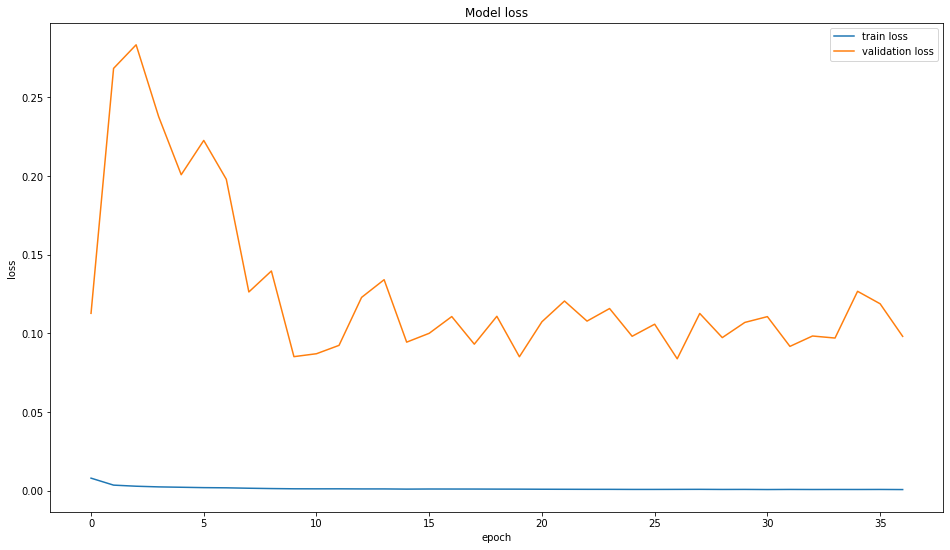

In [221]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [222]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'rsi_2', 'SMA_2',
       'rsi_6', 'SMA_6', 'macd'],
      dtype='object')

In [223]:
  data_val = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']].tail(20))
  data_val.shape
  val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [224]:
pred = gru_model.predict(val_rescaled)
pred

array([[0.22413759, 0.23786262, 0.26819772, 0.29302388, 0.3104639 ,
        0.34194833, 0.38636094, 0.43484965, 0.48074427, 0.5171982 ]],
      dtype=float32)

In [225]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [226]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [227]:
pred_Inverse[0]

array([1.9109083, 2.0257394, 2.279539 , 2.4872482, 2.6331606, 2.8965764,
       3.268156 , 3.6738386, 4.0578175, 4.362811 ], dtype=float32)

In [228]:
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.7365738925499367
MAE is : 0.7106689964805603
RMSE is : 0.8582388318818583
MAPE is : 24.97328112180666
R2 is : -98.42101372150034



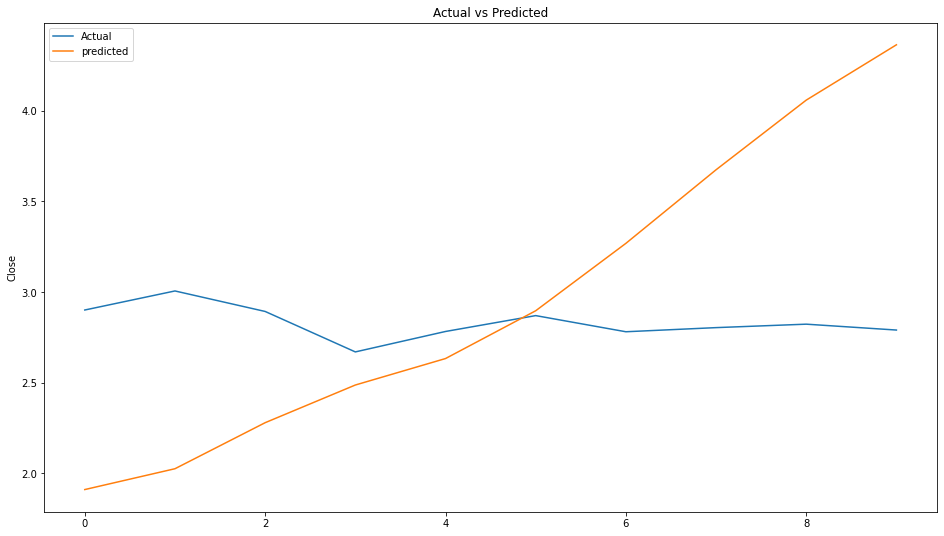

In [229]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()